In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def get_spin_result(win_prob): 
    result = False 
    if np.random.random() <= win_prob: 
        result = True 
    return result



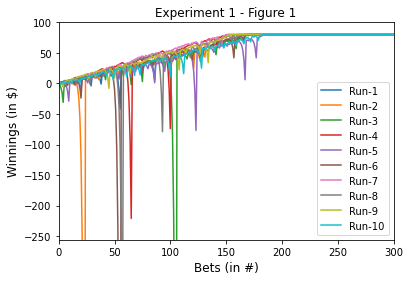

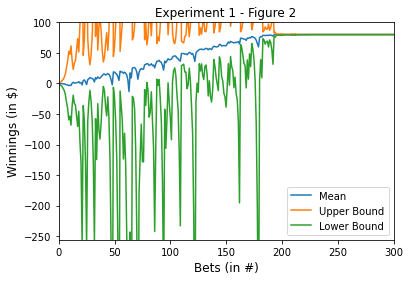

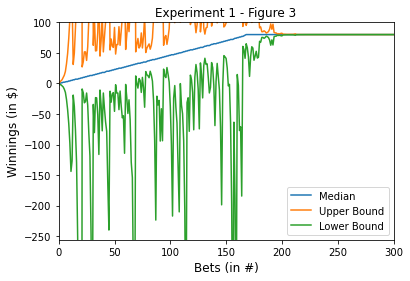

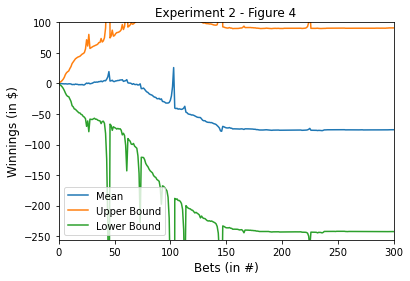

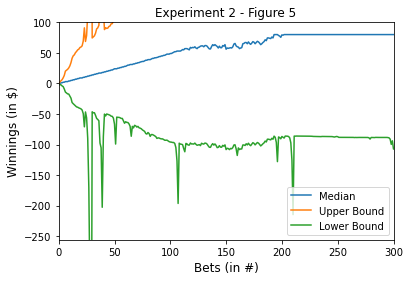

In [8]:
def exp1_gambling_simulator():
    """
    @summary: Simulate the martingale roulette strategy for unlimited funds
    @return winnings: net profit or loss after each bet
    @return total_winnings: total winnings at the end of the experiment
    """

    target_win = 80.0
    total_winnings = 0.0
    init_bet = 1.0
    max_bets = 1000
    bet_num = 0
    overall_win = 1

    winnings = np.full(1000,80)
    while total_winnings < target_win and bet_num < max_bets:
        won = False
        bet_amount = init_bet
        while not won:
            # wager bet_amount on black means set win_prob = 0.5
            win_prob = 0.4737 # set appropriately to the probability of a win
            won = get_spin_result(win_prob) # test the roulette spin
            if won:
                total_winnings += bet_amount
            else:
                total_winnings -= bet_amount
                bet_amount *= 2
            
            winnings[bet_num] = total_winnings
            bet_num += 1
    
    if total_winnings < target_win: overall_win = 0

    return winnings, overall_win

def make_bet(bank, proposed_bet):
    """
    @summary: Make a bet based on a limited bank allocation
    @param bank: limited bank allocation
    @param proposed_bet: bet for the forthcoming roulette spin to check against the bank 
    @return final_bet: updated bet based on cash available in bank
    @return bank: available bank after bet has been made
    """

    if proposed_bet > bank:
        final_bet = bank
        bank = 0
    else:
        final_bet = proposed_bet
        bank -= proposed_bet

    return final_bet, bank

def exp2_gambling_simulator():
    """
    @summary: Simulate the martingale roulette strategy for limited funds
    @return winnings: net profit or loss after each bet
    @return total_winnings: total winnings at the end of the experiment
    """
    
    init_bank = 256.0
    bank = init_bank
    target_win = 80.0
    total_winnings = 0.0
    init_bet = 1.0
    max_bets = 1000
    bet_num = 0
    overall_win = 1

    winnings = np.full(1000,80)
    while total_winnings < target_win and bet_num < max_bets and bank > 0:
        won = False
        bet_amount, bank = make_bet(bank, init_bet)
        while not won and bet_num < max_bets:
            # wager bet_amount on black means set win_prob = 0.5
            win_prob = 0.4737 # set appropriately to the probability of a win
            won = get_spin_result(win_prob) # test the roulette spin
            if won:
                total_winnings += bet_amount
                bank += bet_amount
            else:
                total_winnings -= bet_amount
                bank -= bet_amount

                bet_amount, bank = make_bet(bank, bet_amount * 2)
            
            winnings[bet_num] = total_winnings
            bet_num += 1
    
    if bank == 0: 
        winnings[bet_num:] = -init_bank
        if total_winnings < target_win: overall_win = 0

    return winnings, overall_win

#############################################
############# HELPER FUNCTIONS ##############
#############################################

def plot_data(df, title='Gambling Simulator'):
    '''Plot Gambling Simulations'''
    SMALL_SIZE = 10
    MEDIUM_SIZE = 12
    LARGE_SIZE = 15

    ax = df.plot(title=title, fontsize=LARGE_SIZE)
    ax.set_xlabel('Bets (in #)',fontsize=MEDIUM_SIZE)
    ax.set_ylabel('Winnings (in $)',fontsize=MEDIUM_SIZE)
    ax.set_xlim([0,300])
    ax.set_ylim([-256,100])
    plt.xticks(fontsize=SMALL_SIZE)
    plt.yticks(fontsize=SMALL_SIZE)
    ax.legend(loc="best")
    plt.savefig(title+'.png',dpi=500)
    

def run_figure1():
    labels = ['Run-1','Run-2','Run-3','Run-4','Run-5','Run-6','Run-7','Run-8','Run-9','Run-10']
    runs = pd.DataFrame(data=np.full((1000,10),80),columns=labels)
    for run in labels:
        runs[run],_ = exp1_gambling_simulator()
    plot_data(runs,'Experiment 1 - Figure 1')

def run_figure2():
    runs = pd.DataFrame(data=np.full((1000,1000),80))
    total_wins = 0

    for run in range(1000):
        runs[run], current_wins = exp1_gambling_simulator()
        total_wins += current_wins

    mean = runs.mean(axis=1)
    std = runs.std(axis=1)
    upper_bound = mean + std
    lower_bound = mean - std
    
    data = {'Mean': mean, 'Upper Bound': upper_bound, 'Lower Bound': lower_bound}
    df = pd.DataFrame(data=data)
    plot_data(df,'Experiment 1 - Figure 2')

def run_figure3():
    runs = pd.DataFrame(data=np.full((1000,1000),80))
    for run in range(1000):
        runs[run], _ = exp1_gambling_simulator()

    median = runs.median(axis=1)
    std = runs.std(axis=1)
    upper_bound = median + std
    lower_bound = median - std
    
    data = {'Median': median, 'Upper Bound': upper_bound, 'Lower Bound': lower_bound}
    df = pd.DataFrame(data=data)
    plot_data(df,'Experiment 1 - Figure 3')

def run_figure4():
    runs = pd.DataFrame(data=np.full((1000,1000),80))
    total_wins = 0

    for run in range(1000):
        runs[run], current_win = exp2_gambling_simulator()
        total_wins += current_win

    mean = runs.mean(axis=1)
    std = runs.std(axis=1)
    
    upper_bound = mean + std
    lower_bound = mean - std
    data = {'Mean': mean, 'Upper Bound': upper_bound, 'Lower Bound': lower_bound}
    df = pd.DataFrame(data=data)
    plot_data(df,'Experiment 2 - Figure 4')

def run_figure5():
    runs = pd.DataFrame(data=np.full((1000,1000),80))
    for run in range(1000):
        runs[run], _ = exp2_gambling_simulator()

    median = runs.median(axis=1)
    std = runs.std(axis=1)
    upper_bound = median + std
    lower_bound = median - std
    data = {'Median': median, 'Upper Bound': upper_bound, 'Lower Bound': lower_bound}
    df = pd.DataFrame(data=data)
    plot_data(df,'Experiment 2 - Figure 5')

def run_exp1():
    run_figure1()
    run_figure2()
    run_figure3()

def run_exp2():
    run_figure4()
    run_figure5()

def test_code():
    run_exp1()
    run_exp2()
    
if __name__ == "__main__": 
    test_code() 